In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv(r'C:\Users\91934\Downloads\homeprices.csv')
df




,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


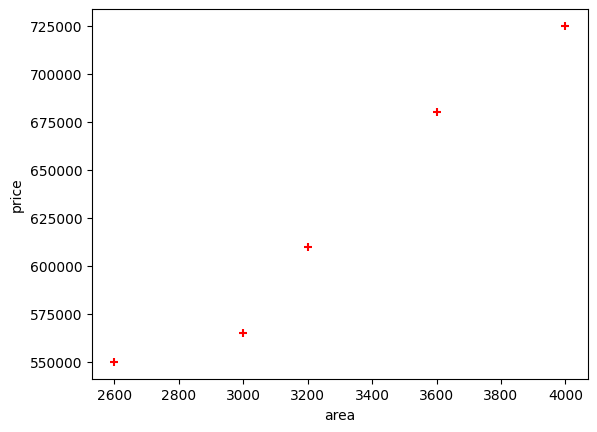

In [14]:
%matplotlib inline 
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df[['area']],df.price,color='red',marker='+')

In [21]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(df[['area']],df.price)
linear_regression.predict([[3000]])

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])